# Project 4: Write a Data Science Blog Post

## Introduction

    In this project we will analysis and exploring the 2017 Stack Overflow results in order to glean some information  
    developers and what to focus on to have the best career 
    
    each question will contain these steps respectively:
        1- Data Prepration
        2- Data Modeling
        3- Evaluate the Results

In [90]:
# Frist importing the needed libraries
import pandas as pd
pd.set_option('display.max_rows', 90)
pd.set_option('display.max_columns', 90)
pd.set_option('display.width', 1000)
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# for matplotlib, my jupyter version doesn't support the space for the magic function 
# keep sure to include the space if you need
%matplotlib inline

<a id='pick'></a>
## Pick a Dataset
    In this section of the report, we will load in the data

### General Properties
    Loading the data and printing out a few lines.

In [91]:
# Loading the data
df = pd.read_csv('survey_results_public.csv')
df_shc = pd.read_csv('survey_results_schema.csv')

In [92]:
# printing out a few lines.
df.head()

,Respondent,Professional,ProgramHobby,Country,University,EmploymentStatus,FormalEducation,MajorUndergrad,HomeRemote,CompanySize,CompanyType,YearsProgram,YearsCodedJob,YearsCodedJobPast,DeveloperType,WebDeveloperType,MobileDeveloperType,NonDeveloperType,CareerSatisfaction,JobSatisfaction,ExCoderReturn,ExCoderNotForMe,ExCoderBalance,ExCoder10Years,ExCoderBelonged,ExCoderSkills,ExCoderWillNotCode,ExCoderActive,PronounceGIF,ProblemSolving,BuildingThings,LearningNewTech,BoringDetails,JobSecurity,DiversityImportant,AnnoyingUI,FriendsDevelopers,RightWrongWay,UnderstandComputers,SeriousWork,InvestTimeTools,WorkPayCare,KinshipDevelopers,ChallengeMyself,CompetePeers,...,EquipmentSatisfiedMonitors,EquipmentSatisfiedCPU,EquipmentSatisfiedRAM,EquipmentSatisfiedStorage,EquipmentSatisfiedRW,InfluenceInternet,InfluenceWorkstation,InfluenceHardware,InfluenceServers,InfluenceTechStack,InfluenceDeptTech,InfluenceVizTools,InfluenceDatabase,InfluenceCloud,InfluenceConsultants,InfluenceRecruitment,InfluenceCommunication,StackOverflowDescribes,StackOverflowSatisfaction,StackOverflowDevices,StackOverflowFoundAnswer,StackOverflowCopiedCode,StackOverflowJobListing,StackOverflowCompanyPage,StackOverflowJobSearch,StackOverflowNewQuestion,StackOverflowAnswer,StackOverflowMetaChat,StackOverflowAdsRelevant,StackOverflowAdsDistracting,StackOverflowModeration,StackOverflowCommunity,StackOverflowHelpful,StackOverflowBetter,StackOverflowWhatDo,StackOverflowMakeMoney,Gender,HighestEducationParents,Race,SurveyLong,QuestionsInteresting,QuestionsConfusing,InterestedAnswers,Salary,ExpectedSalary
0,1,Student,"Yes, both",United States,No,"Not employed, and not looking for work",Secondary school,NaN,NaN,NaN,NaN,2 to 3 years,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"With a soft ""g,"" like ""jiff""",Strongly agree,Strongly agree,Agree,Disagree,Strongly agree,Agree,Agree,Disagree,Somewhat agree,Disagree,Strongly agree,Strongly agree,Strongly disagree,Agree,Agree,Disagree,...,Somewhat satisfied,Not very satisfied,Not at all satisfied,Very satisfied,Satisfied,Not very satisfied,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,I have created a CV or Developer Story on Stac...,9.0,Desktop; iOS app,At least once each week,Haven't done at all,Once or twice,Haven't done at all,Haven't done at all,Several times,Several times,Once or twice,Somewhat agree,Strongly disagree,Strongly disagree,Strongly agree,Agree,Strongly agree,Strongly agree,Strongly disagree,Male,High school,White or of European descent,Strongly disagree,Strongly agree,Disagree,Strongly agree,NaN,NaN
1,2,Student,"Yes, both",United Kingdom,"Yes, full-time",Employed part-time,Some college/university study without earning ...,Computer science or software engineering,"More than half, but not all, the time",20 to 99 employees,"Privately-held limited company, not in startup...",9 to 10 years,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"With a hard ""g,"" like ""gift""",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,Not very satisfied,Satisfied,Satisfied,Satisfied,Somewhat satisfied,Satisfied,No influence at all,No influence at all,No influence at all,No influence at all,No influence at all,No influence at all,No influence at all,No influence at all,No influence at all,No influence at all,No influence at all,I have created a CV or Developer Story on Stac...,8.0,Desktop; iOS browser; iOS app; Android browser...,Several times,Several times,Once or twice,Once or twice,Once or twice,Haven't done at all,Several times,At least once each week,Disagree,Strongly disagree,Strongly disagree,Strongly agree,Agree,Strongly agree,Strongly agree,Strongly disagree,Male,A master's degree,White or of European descent,Somewhat agree,Somewhat agree,Disagree,Strongly agree,NaN,37500.0
2,3,Professional developer,"Yes, both",United Kingdom,No,Employed full-time,Bachelor's degree,Computer science or software engineering,"Less than half the time, but at least one day ...","10,000 or more 

In [93]:
# printing out a few lines.
df_shc

,Column,Question
0,Respondent,Respondent ID number
1,Professional,Which of the following best describes you?
2,ProgramHobby,Do you program as a hobby or contribute to ope...
3,Country,In which country do you currently live?
4,University,"Are you currently enrolled in a formal, degree..."
5,EmploymentStatus,Which of the following best describes your cur...
6,FormalEducation,Which of the following best describes the high...
7,MajorUndergrad,Which of the following best describes your mai...
8,HomeRemote,How often do you work from home or remotely?
9,CompanySize,"In terms of the number of employees, how large..."


<a id='que'></a>
## Pose at least three questions related to business or real-world applications of how the data could be used.

## Research Questions:
  <ul>
  <li><a href="#q1">1. Which type of the developers has the highest average salary ?</a></li>
  <li><a href="#q2">2. Which programming language has the highest job satisfaction ?</a></li>
  <li><a href="#q3">3. Are the bigger organizations gives higher salary ?</a></li>
  </ul>

## Early prepration
    here we will creating all the necessary methods that will help us through the project 

In [94]:
def split_column(column_to_split, delimeter, column_to_store, df):
    """
    Method to split a columns values by a provided delimeter while
    retaining the associated value of another column.
    
    :param str column_to_split: column whose values are to be split
    :param str delimeter: delimeter to split by
    :param str columns_to_store: column who's data must be stored along split rows
    :param DataFrame df: dataframe to use
    """
    split_col = pd.DataFrame(columns = [column_to_split, column_to_store])
    for index, row in df.iterrows():
        columns = row[column_to_split].split(delimeter)
        for c in columns:
            split_col.loc[len(split_col)] = [c, row[column_to_store]]
    return split_col

<a id='q1'></a>
## Question 1: Which type of the developers has the highest average salary ?

### 1.1 Data Prepration

The data will be prepared here by selecting the desired columns.

If the row had Salary or DeveloperType as Nan then the row would be dropped, this is becase I was trying to find a correlation between the two and therefore they needed to exist, this was the only way in which I needed to handle Nan values and categorical values.

In [95]:
# extracting the desire columns
q1 = df[['DeveloperType', 'Salary']]

# dropping all null values
q1 = q1.dropna(subset=['Salary', 'DeveloperType'], axis=0)

# diplaying
q1.head()

,DeveloperType,Salary
2,Other,113750.0
14,Embedded applications/devices developer,100000.0
17,Web developer; Embedded applications/devices d...,130000.0
18,Web developer,82500.0
22,Other,100764.0


### 1.2 Data Modeling

In [96]:
# spliting the column DeveloperType using split_column method
split_languages = split_column("DeveloperType", "; ", "Salary", q1)
split_languages.head()

,DeveloperType,Salary
0,Other,113750.0
1,Embedded applications/devices developer,100000.0
2,Web developer,130000.0
3,Embedded applications/devices developer,130000.0
4,DevOps specialist,130000.0


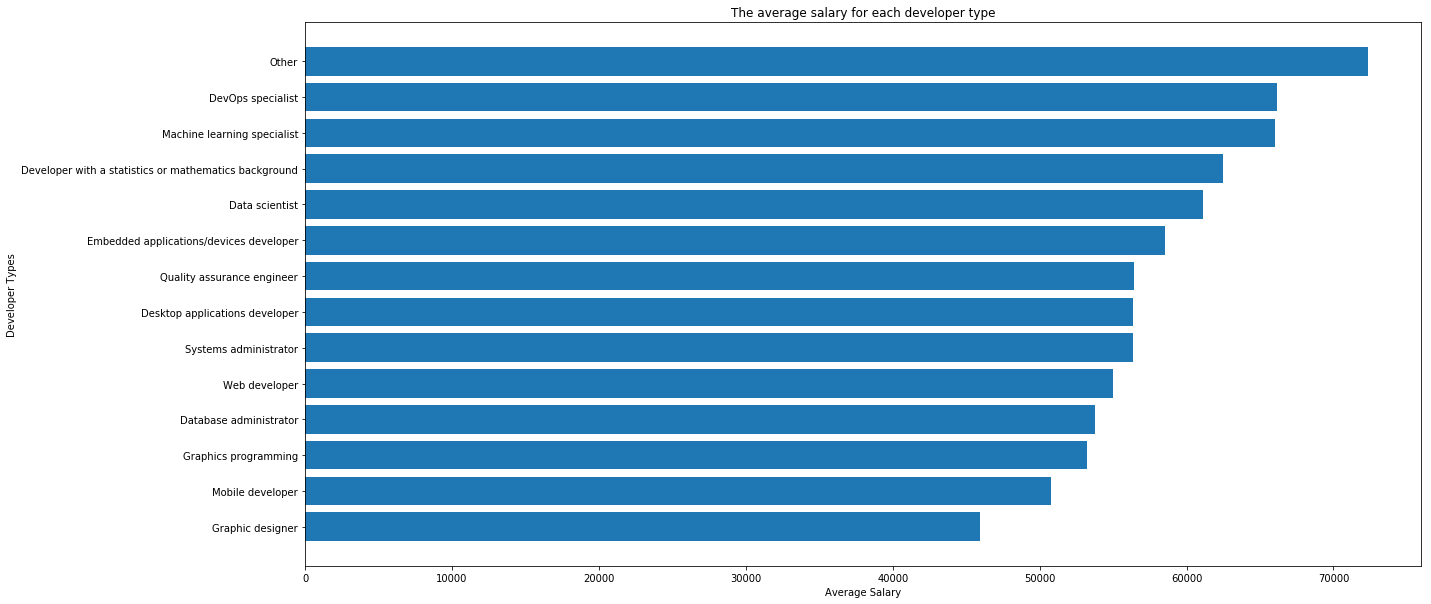

In [107]:
# making the x asix
q1_answer = split_languages.groupby(['DeveloperType']).mean()['Salary'].sort_values()

# taking the unique values of HaveWorkedLanguage column
names1 = split_languages.groupby(['DeveloperType']).mean()['Salary'].sort_values().index
y_names1 = np.arange(len(names1))

# editing the plot size
plt.figure(figsize = (20, 10))

# creating the plot
plt.barh(y_names1, q1_answer)

# configure the y axis  
plt.yticks(y_names1, names1)

# setting titles
plt.title('The average salary for each developer type')
plt.xlabel('Average Salary')
plt.ylabel('Developer Types');

### 1.3 Evaluate the Results

As the plot show we can see that the lower part where the low_type developer like graphic designer and graphic programming, and for the middle where the regular_type developers like quality assurance engineer and we developer, for the top part where the AI developer sit like ML specialist and DevOps specialist

<a id='q2'></a>
## Question 2: Which programming language has the highest job satisfaction ?

### 2.1 Data Prepration

The data will be prepared here by selecting the desired columns and only using the rows where a professional devloper was taking the survey All rows were dropped where the Professional column did not equal "Professional Developer" as I was only interested in Professional Developers.

If the row had JobSatisfaction or HaveWorkedLanguage as Nan then the row would be dropped. This is becase I was trying to find a correlation between the two and therefore they needed to exist. This was the only way in which I needed to handle Nan values and categorical values.

In [98]:
# extracting the desire columns
q2 = df[['Professional', 'HaveWorkedLanguage', 'JobSatisfaction']]

# drop all row expect the ones where Professional == "Professional developer"
q2 = q2[q2.Professional == "Professional developer"]
q2 = q2.drop('Professional', 1)

# dropping all null values
q2 = q2.dropna(subset=['JobSatisfaction', 'HaveWorkedLanguage'], axis=0)

# diplaying
q2.head()

,HaveWorkedLanguage,JobSatisfaction
2,Java; PHP; Python,9.0
7,CoffeeScript; Clojure; Elixir; Erlang; Haskell...,7.0
8,C#; JavaScript,6.0
9,Objective-C; Swift,8.0
13,Java; JavaScript; Ruby; SQL,6.0


### 2.2 Data Modeing

In [99]:
# spliting the column HaveWorkedLanguage using split_column method
split_languages_q2 = split_column("HaveWorkedLanguage", "; ", "JobSatisfaction", q2)

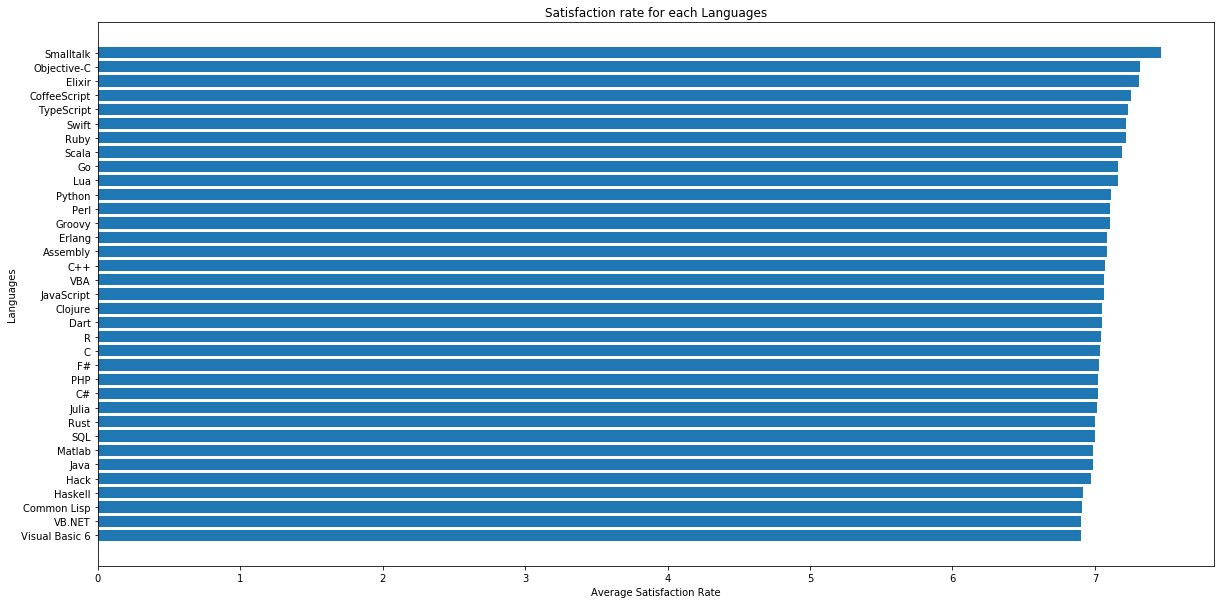

In [106]:
# making the x asix
result2 = split_languages_q2.groupby(['HaveWorkedLanguage']).mean()['JobSatisfaction'].sort_values()

# taking the unique values of HaveWorkedLanguage column
names2 = split_languages_q2.groupby(['HaveWorkedLanguage']).mean()['JobSatisfaction'].sort_values().index
y_names2 = np.arange(len(names2))

# editing the plot size
plt.figure(figsize = (20, 10))

# creating the plot
plt.barh(y_names2, result2)

# configure the y axis  
plt.yticks(y_names2, names2)

# setting titles
plt.title('Satisfaction rate for each Languages')
plt.xlabel('Average Satisfaction Rate')
plt.ylabel('Languages');

### 2.3 Evaluate the Results

There is a similar curve here to correlation between languages and salaries. While this could mean that those with more specialized skill sets feel that they are more valuable and therefore are more satisfied with their jobs, it could simply be that those who are paid more are more satisfied.

<a id='q2'></a>
## Question 3: Are the bigger organizations gives higher salary ?

### 3.1 Data Prepration

The data will be prepared here by selecting the desired columns and only using the rows where a professional devloper was taking the survey All rows were dropped where the Professional column did not equal "Professional Developer" as I was only interested in Professional Developers.

If the row had CompanySize or Salary as Nan then the row would be dropped. This is becase I was trying to find a correlation between the two and therefore they needed to exist. This was the only way in which I needed to handle Nan values and categorical values.

In [101]:
# extracting the desire columns
q3 = df[['Professional', 'CompanySize', 'Salary']]

# drop all row expect the ones where Professional == "Professional developer"
q3 = q3[q3.Professional == "Professional developer"]
q3 = q3.drop('Professional', 1)

# dropping all null values
q3 = q3.dropna(subset=['CompanySize', 'Salary'], axis=0)

# displaying
q1.head()

,DeveloperType,Salary
2,Other,113750.0
14,Embedded applications/devices developer,100000.0
17,Web developer; Embedded applications/devices d...,130000.0
18,Web developer,82500.0
22,Other,100764.0


In [102]:
# dropping the values where has no answer
q3 = q3[q3['CompanySize'] != "I don't know"]
q3 = q3[q3['CompanySize'] != "I prefer not to answer"]

### 3.2 Data Modeing

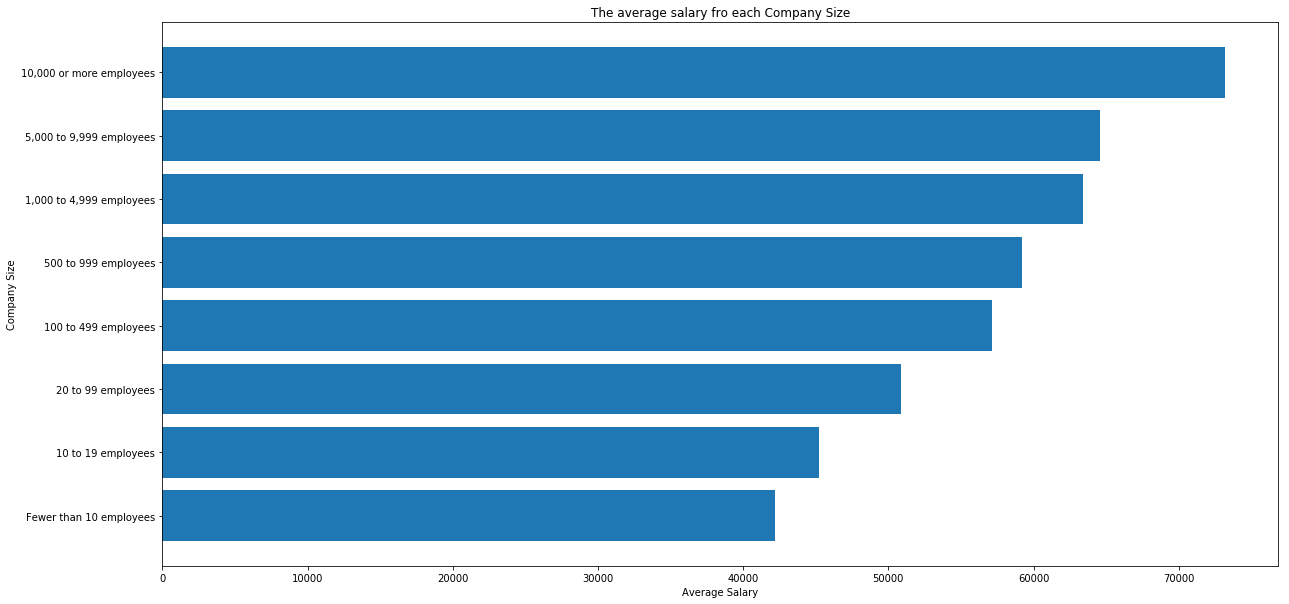

In [108]:
# making the x asix
result3 = q3.groupby(['CompanySize']).mean()['Salary'].sort_values()

# taking the unique values of CompanySize column
indx = q3.groupby(['CompanySize']).mean()['Salary'].sort_values().index
y_names3 = np.arange(len(indx))

# editing the plot size
plt.figure(figsize = (20, 10))

# creating the plot
plt.barh(y_names3, result3)

# configure the y axis  
plt.yticks(y_names3, indx);

# setting titles
plt.title('The average salary fro each Company Size')
plt.xlabel('Average Salary')
plt.ylabel('Company Size');

### 3.3 Evaluate the Results

So obvious that the bigger organization is the higher salary would offer, but we have to consider that big firms hire the AI developer and researcher where we found that they have the highest salary comparing to other developers.  